In [4]:
from transformers import GPT2LMHeadModel


/opt/anaconda3/envs/neural-nets-ready/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2")
state_dict = model_hf.state_dict()

for k,v in state_dict.items():
    print(k, v.shape)

/opt/anaconda3/envs/neural-nets-ready/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [8]:
state_dict['transformer.wpe.weight'].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

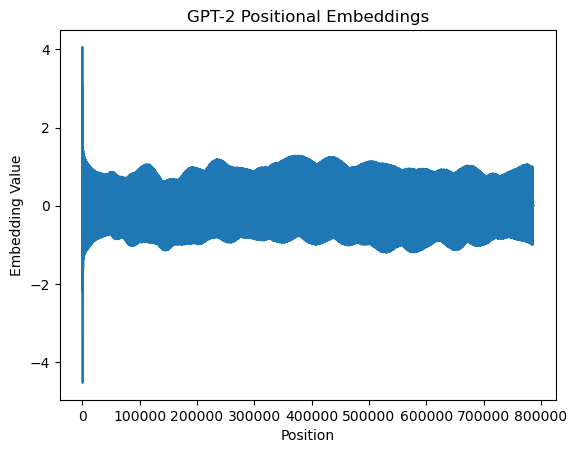

In [9]:
import matplotlib.pyplot as plt
plt.plot(state_dict['transformer.wpe.weight'].view(-1).numpy())
plt.title('GPT-2 Positional Embeddings')
plt.xlabel('Position')
plt.ylabel('Embedding Value')
plt.show()

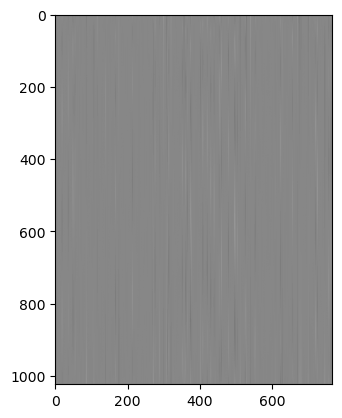

In [10]:
plt.imshow(state_dict['transformer.wpe.weight'], cmap = 'gray')

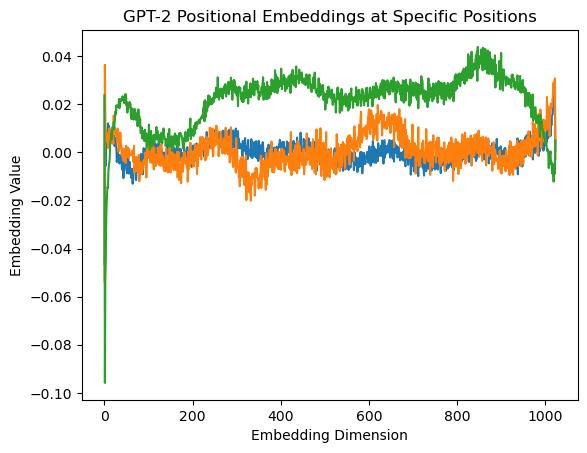

In [12]:
plt.plot(state_dict['transformer.wpe.weight'][:, 150])
plt.plot(state_dict['transformer.wpe.weight'][:, 200])
plt.plot(state_dict['transformer.wpe.weight'][:, 250])
plt.title('GPT-2 Positional Embeddings at Specific Positions')
plt.xlabel('Embedding Dimension')
plt.ylabel('Embedding Value')
plt.legend
plt.show()

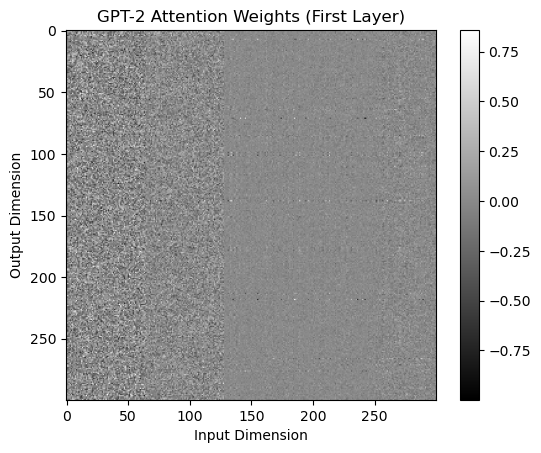

In [17]:
plt.imshow(state_dict['transformer.h.1.attn.c_attn.weight'][:300, :300], cmap='gray')
plt.title('GPT-2 Attention Weights (First Layer)')
plt.xlabel('Input Dimension')
plt.ylabel('Output Dimension')
plt.colorbar()
plt.show()

In [1]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
text = "Hello, I am a language model and I can"
generator(text, max_length=30, num_return_sequences=5)

/opt/anaconda3/envs/neural-nets-ready/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/anaconda3/envs/neural-nets-ready/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:502

[{'generated_text': 'Hello, I am a language model and I can understand your desire to understand the syntax of other languages and I think you would understand mine by thinking that'},
 {'generated_text': 'Hello, I am a language model and I can just say, "Here\'s an example of a human language model by a linguist," and have'},
 {'generated_text': "Hello, I am a language model and I can't tell you much about what goes on. What can you tell me about the problem with this one"},
 {'generated_text': 'Hello, I am a language model and I can work with anything we want.\n\nThis article will show you how to make a language model from'},
 {'generated_text': 'Hello, I am a language model and I can create functional and expressive design languages. In fact, I am the author of Functional Design Language. I'}]

In [13]:
tril = torch.tril(torch.ones(3, 3))
tril

tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]])

In [14]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype = torch.float)

In [17]:
x

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [16]:
x @ tril

tensor([[ 6.,  5.,  3.],
        [15., 11.,  6.],
        [24., 17.,  9.]])

In [18]:
tril.view(1, 1, 3, 3)

tensor([[[[1., 0., 0.],
          [1., 1., 0.],
          [1., 1., 1.]]]])

In [19]:
tril

tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]])

In [25]:
qkv = torch.ones(3, 9)
q, k, v = qkv.split(3, 1)
q.shape

torch.Size([3, 3])

In [26]:
torch.manual_seed(1337)
B, T, C = 4, 8, 2
x = torch.randn(B, T, C)
x.shape

torch.Size([4, 8, 2])

In [28]:
xbow = torch.zeros((B, T, C))
for b in range(B):
    for t in range(T):
        xbowprev = x[b, : t + 1]
        xbow[b, t] = torch.mean(xbowprev, 0)

In [29]:
xbow[0]

tensor([[ 0.1808, -0.0700],
        [-0.0894, -0.4926],
        [ 0.1490, -0.3199],
        [ 0.3504, -0.2238],
        [ 0.3525,  0.0545],
        [ 0.0688, -0.0396],
        [ 0.0927, -0.0682],
        [-0.0341,  0.1332]])

In [30]:
wei = torch.tril(torch.ones(T, T))
wei = wei / wei.sum(1, keepdim = True)
wei


tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

In [ ]:
xbow2 = wei @ x # (T, T) @ (B, T, C)

In [32]:
torch.allclose(xbow, xbow2)

True

In [44]:
from torch.nn import functional as F

tril = torch.tril(torch.ones(T, T))
wei = torch.zeros((T, T))
wei = wei.masked_fill(tril == 0, float('-inf'))


In [45]:
wei

tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [46]:
wei = F.softmax(wei, dim = -1)
wei

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

In [47]:
xbow3 = wei @ x
torch.allclose(xbow2, xbow3)

True

In [48]:
with open('input.txt', 'r') as f:
    text = f.read()


In [49]:
data = text[:1000]
print(data[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [ ]:
import tiktoken
encoder = tiktoken.get_encoding("gpt2")
tokens = encoder.encode(data)
print(tokens[:24])

[5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11, 3285, 502, 2740, 13, 198, 198, 3237, 25, 198, 5248]


In [54]:
import torch
buf = torch.tensor(tokens[:24 + 1], dtype=torch.int64)
x = buf[:-1].view(4, 6)
y = buf[1:].view(4, 6)
print(x)
print(y)

tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13]])
tensor([[22307,    25,   198,  8421,   356,  5120],
        [  597,  2252,    11,  3285,   502,  2740],
        [   13,   198,   198,  3237,    25,   198],
        [ 5248,   461,    11,  2740,    13,   198]])


In [2]:
import tiktoken
import torch
device = 'cpu' # or 'cuda' if torch.cuda.is_available()
enc = tiktoken.get_encoding("gpt2")
with open('input.txt', 'r') as f:
    text = f.read()
text = text[:1000]
tokens = enc.encode(text)
B, T = 4, 32
buf = torch.tensor(tokens[:B*T + 1])
buf = buf.to(device)
x = buf[:-1].view(B, T)
y = buf[1:].view(B, T)

In [6]:
print(state_dict["lm_head.weight"].shape)
print(state_dict["transformer.wte.weight"].shape)

torch.Size([50257, 768])
torch.Size([50257, 768])


In [7]:
(state_dict["lm_head.weight"] == state_dict["transformer.wte.weight"]).all()

tensor(True)

In [8]:
state_dict["lm_head.weight"].data_ptr() == state_dict["transformer.wte.weight"].data_ptr()

True

In [ ]:
#scaling of residual connections
x = torch.zeros(768)
n = 100 # eg 100 layers
for _ in range(n):
    x = x + n**-0.5 * torch.randn(768)
print(x.std()) # we should get one 1 / sqrt(n) scaling

tensor(1.0154)
